In [921]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib import cm
from matplotlib.patheffects import withStroke

In [1095]:
path = './UNDP_HDI_Trends&Characteristics.xlsx'
hdi_char = pd.read_excel(path, sheet_name='HDI characteristics')
hdi_trends = pd.read_excel(path, sheet_name='HDI trends')
hdi_growth = pd.read_excel(path, sheet_name='HDI average growth (annual)')

In [1096]:
hdi_growth

,HDI rank,Country,1990-2000,2000-2010,2010-2021,1990-2021
0,1,Switzerland,0.415188,0.603416,0.191175,0.396274
1,2,Norway,0.860862,0.302529,0.191376,0.442772
2,3,Iceland,0.716292,0.350338,0.558614,0.542184
3,4,"Hong Kong, China (SAR)",0.772106,0.639338,0.441176,0.611757
4,5,Australia,0.35273,0.297329,0.27205,0.306225
...,...,...,...,...,...,...
186,187,Burundi,0.238797,3.150148,0.460624,1.248237
187,188,Central African Republic,-0.269518,1.235936,0.753012,0.577042
188,189,Niger,1.949419,2.579727,1.54286,2.007583
189,190,Chad,..,2.207216,0.773033,..


In [1017]:
# hdi_char.set_index('HDI rank', inplace=True)
hdi_char.sort_index().head(3)

,Country,HDI,Life expectancy (Years),Schooling (Years),Mean schooling (Years),GNI per capita (PPP $),Difference (GNI-HDI)
HDI rank,,,,,,,
1,Norway,0.961,83.2339,18.185200,13.00363,64660.10622,6
2,Iceland,0.959,82.6782,19.163059,13.76717,55782.04981,11
3,Switzerland,0.962,83.9872,16.500299,13.85966,66933.00454,5


In [494]:
hdi_trends.set_index('HDI rank', inplace=True)
hdi_trends.head(3)

,Country,1990,2000,2010,2015,2018,2019,2020,2021
HDI rank,,,,,,,,,
1,Switzerland,0.851,0.887,0.942,0.954,0.959,0.962,0.956,0.962
2,Norway,0.838,0.913,0.941,0.953,0.962,0.961,0.959,0.961
3,Iceland,0.811,0.871,0.902,0.945,0.959,0.960,0.957,0.959


In [1098]:
# hdi_growth.set_index('HDI rank', inplace=True)
hdi_growth.head(5)

,HDI rank,Country,1990-2000,2000-2010,2010-2021,1990-2021
0,1,Switzerland,0.415188,0.603416,0.191175,0.396274
1,2,Norway,0.860862,0.302529,0.191376,0.442772
2,3,Iceland,0.716292,0.350338,0.558614,0.542184
3,4,"Hong Kong, China (SAR)",0.772106,0.639338,0.441176,0.611757
4,5,Australia,0.35273,0.297329,0.27205,0.306225


In [1136]:
# Extracting data for the top five countries of Human Development index.
plot1 = hdi_trends.sort_index().head(5)
plot1 = plot1.reset_index().set_index('Country').drop(['HDI rank','index'], axis=1)

# Extracting data for top five countries with the highest growth rate of HDI.
plot2 = hdi_growth.sort_index().head(5)
plot2 = plot2.reset_index().set_index('Country').drop(['HDI rank', 'index'], axis=1)

# Extracting characteristics for the top ranking country in HDI.
plot3 = hdi_char.sort_index().head(1)
plot3 = plot3.reset_index().set_index('Country').drop(['HDI rank', 'index'], axis=1)
plot3.drop(['HDI', 'Difference (GNI-HDI)'], axis=1, inplace=True)
plot3 = plot3.T.reset_index()
plot3 = plot3.rename(columns={'index':'Attributes', 'Norway':'Values'})

# Comparing characteristics with top 5 countries.
plot4 = hdi_char.sort_index().head(5)
plot4 = plot4.set_index('HDI rank')

,Country,HDI,Life expectancy (Years),Schooling (Years),Mean schooling (Years),GNI per capita (PPP $),Difference (GNI-HDI)
HDI rank,,,,,,,
3,Switzerland,0.962,83.9872,16.500299,13.85966,66933.00454,5
1,Norway,0.961,83.2339,18.185200,13.00363,64660.10622,6
2,Iceland,0.959,82.6782,19.163059,13.76717,55782.04981,11
4,"Hong Kong, China (SAR)",0.952,85.4734,17.278170,12.22621,62606.84540,6
5,Australia,0.951,84.5265,21.054590,12.72682,49238.43335,18


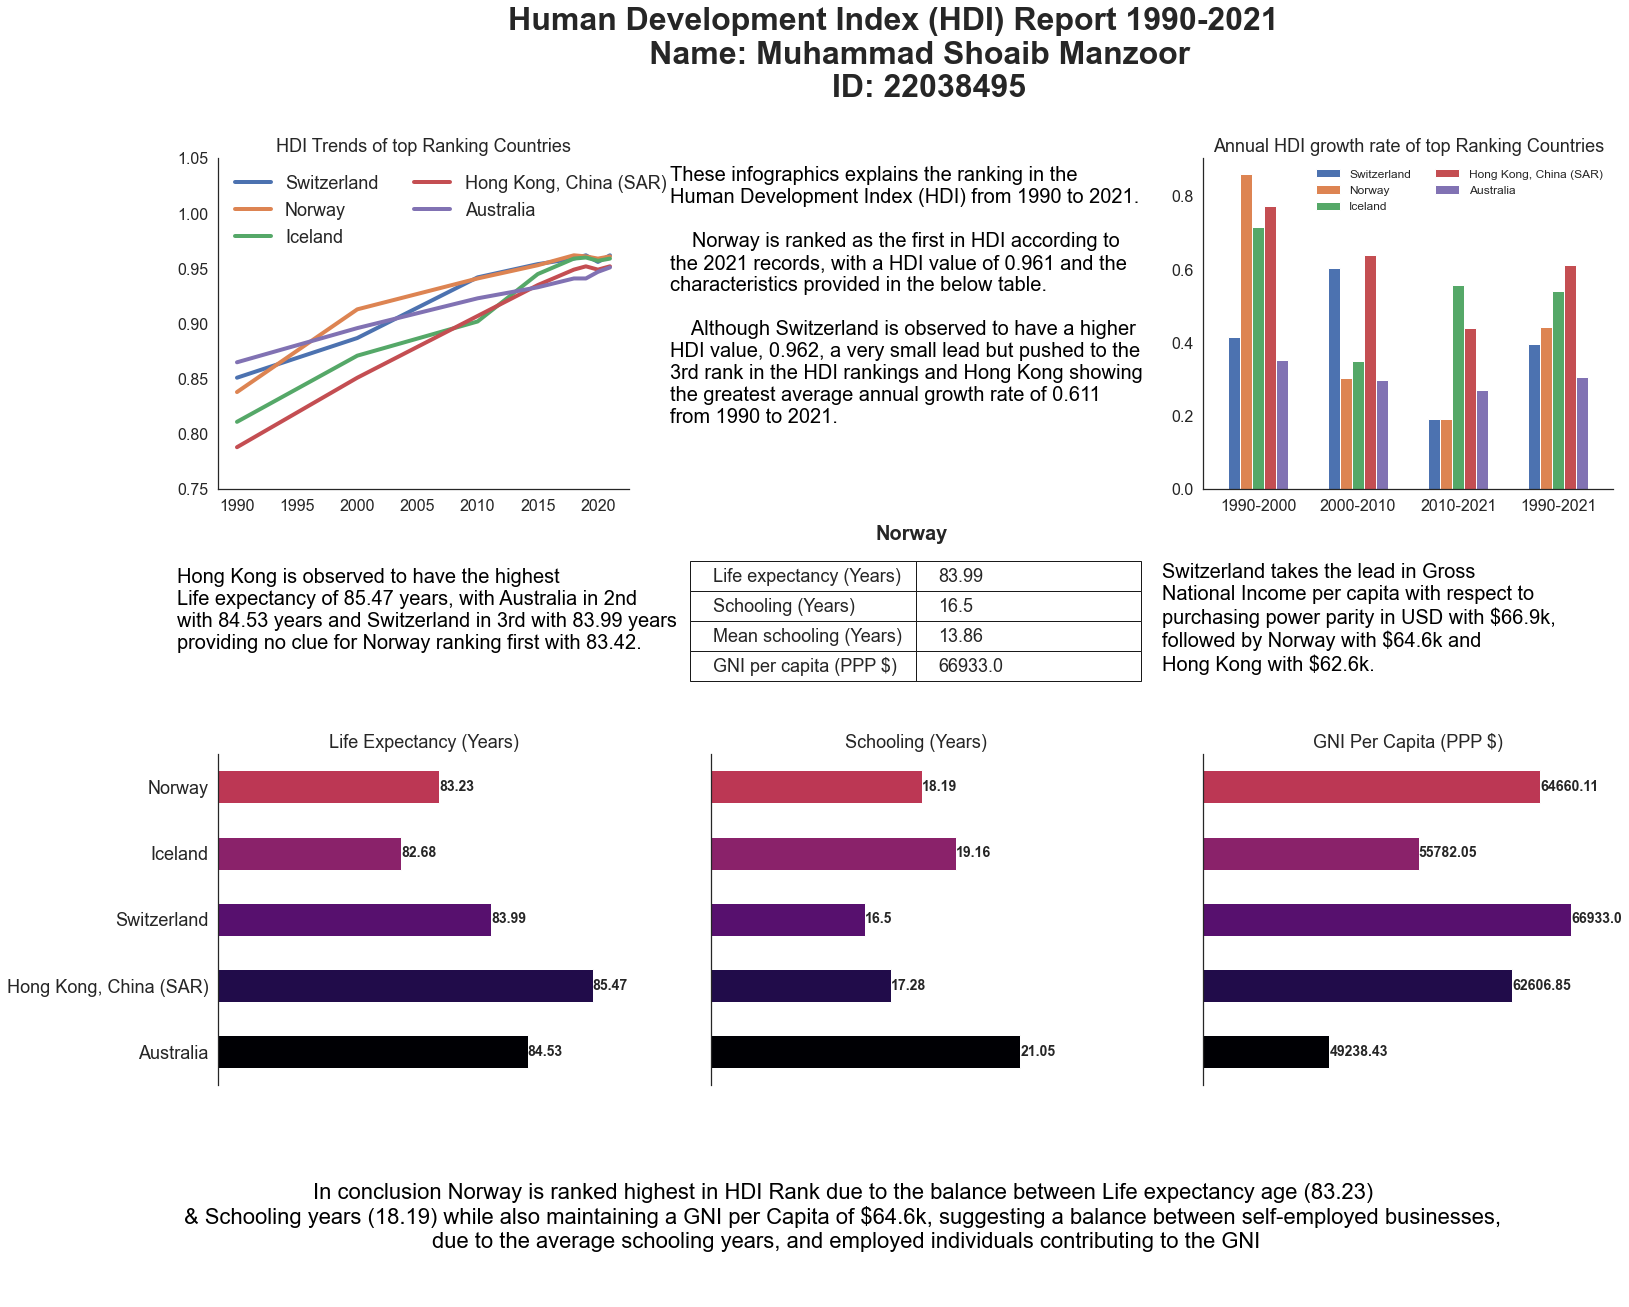

In [1140]:
path = './UNDP_HDI_Trends&Characteristics.xlsx'
hdi_char = pd.read_excel(path, sheet_name='HDI characteristics')
hdi_trends = pd.read_excel(path, sheet_name='HDI trends')
hdi_growth = pd.read_excel(path, sheet_name='HDI average growth (annual)')

# Extracting data for the top five countries of Human Development index.
plot1 = hdi_trends.sort_index().head(5)
plot1 = plot1.reset_index().set_index('Country').drop(['HDI rank','index'], axis=1)

# Extracting data for top five countries with the highest growth rate of HDI.
plot2 = hdi_growth.sort_index().head(5)
plot2 = plot2.reset_index().set_index('Country').drop(['HDI rank', 'index'], axis=1)

# Extracting characteristics for the top ranking country in HDI.
plot3 = hdi_char.sort_index().head(1)
plot3 = plot3.reset_index().set_index('Country').drop(['HDI rank', 'index'], axis=1)
plot3.drop(['HDI', 'Difference (GNI-HDI)'], axis=1, inplace=True)
plot3 = plot3.T.reset_index()
plot3 = plot3.rename(columns={'index':'Attributes', 'Norway':'Values'})

# Comparing characteristics with top 5 countries.
plot4 = hdi_char.sort_index().head(5)
plot4 = plot4.set_index('HDI rank')


fig = plt.figure(figsize=(25,21))
fig.suptitle('''Human Development Index (HDI) Report 1990-2021
      Name: Muhammad Shoaib Manzoor
        ID: 22038495''',
             fontsize=32,
             fontweight='bold')


gs = gridspec.GridSpec(4, 3, width_ratios=[2, 2, 2], height_ratios=[2, 1, 2, 1])
colors = cm.inferno(np.linspace(0, 0.5, len(plot4['Country'])))


ax1 = plt.subplot(gs[0, 0])
ax1.plot(plot1.T, label='HDI Trends of top Ranking Countries',
         linewidth=4)
ax1.set_title('HDI Trends of top Ranking Countries', fontsize=18)
ax1.set_ylim(bottom=0.750, top=1.05)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(labelsize=16)
ax1.legend(labels=plot1.index,
           loc='upper left',
           frameon=False,
           ncols=2, fontsize=18)

ax2 = plt.subplot(gs[0, 2])
plot2.T.plot(kind='bar', ax=ax2, width=0.6)
ticks = range(len(plot2.columns))
ax2.set_xticks(ticks=ticks, labels=plot2.columns, rotation=0)
ax2.set_title('Annual HDI growth rate of top Ranking Countries', fontsize=18)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(labelsize=16)
ax2.legend(loc='upper right',
           frameon=False,
           ncols=2, fontsize=12)

plot3 = round(plot3, 2)
table_data = [plot3.columns.tolist()] + plot3.values.tolist()
ax3 = plt.subplot(gs[1, 1])
ax3.axis('off')
table = ax3.table(cellText=table_data[1:], colLoc='center', cellLoc='left', loc='center', edges='closed')
table.auto_set_font_size(False)
table.set_fontsize(18)
table.scale(1.1, 2.5)
ax3.set_title('Norway', fontsize=20, fontweight='bold', loc='center', x=0.49, y=0.96)
ax3.tick_params(labelsize=16)


ax4 = plt.subplot(gs[2, 0])
plot4 = plot4.sort_values(['HDI rank','Life expectancy (Years)', 
                           'Schooling (Years)', 'GNI per capita (PPP $)'], 
                           ascending=False)
plot4.plot(kind='barh', x='Country', y='Life expectancy (Years)', ax=ax4, legend=False, 
           color=colors)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.set_xticks([])
for i, v in enumerate(plot4.values[:,2]):
    ax4.text(v, i, str(round(v,2)), ha='left', va='center', fontsize=14, fontweight='bold')
ax4.set_title('Life Expectancy (Years)', fontsize=18)
ax4.set_xlim(left=80, right=86)
ax4.set_ylabel('')
ax4.tick_params(axis='x', labelsize=16)
ax4.tick_params(axis='y', labelsize=18)


ax4 = plt.subplot(gs[2, 1])
bars = plot4.plot(kind='barh', x='Country', y='Schooling (Years)', ax=ax4, legend=False, 
           color=colors)
for i, v in enumerate(plot4.values[:,3]):
    ax4.text(v, i, str(round(v,2)), ha='left', va='center', fontsize=14, fontweight='bold')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.set_title('Schooling (Years)', fontsize=18)
ax4.set_xlim(left=12, right=24)
ax4.set_ylabel('')
ax4.set_yticks([])
ax4.set_xticks([])
ax4.tick_params(labelsize=16)


ax4 = plt.subplot(gs[2, 2])
plot4.plot(kind='barh', x='Country', y='GNI per capita (PPP $)', ax=ax4, legend=False, 
           color=colors)
for i, v in enumerate(plot4.values[:,5]):
    ax4.text(v, i, str(round(v,2)), ha='left', va='center', fontsize=14, fontweight='bold')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.set_xticks([])
ax4.set_title('GNI Per Capita (PPP $)', fontsize=18)
ax4.set_xlim(left=40000, right=70000)
ax4.set_ylabel('')
ax4.set_yticks([])
ax4.tick_params(labelsize=16)

text1 = '''These infographics explains the ranking in the 
Human Development Index (HDI) from 1990 to 2021.

    Norway is ranked as the first in HDI according to
the 2021 records, with a HDI value of 0.961 and the
characteristics provided in the below table.

    Although Switzerland is observed to have a higher
HDI value, 0.962, a very small lead but pushed to the
3rd rank in the HDI rankings and Hong Kong showing 
the greatest average annual growth rate of 0.611 
from 1990 to 2021.'''
text_ax = plt.subplot(gs[0, 1])
text_ax.text(-0.1, 0.2, text1, fontsize=20, color='black')
text_ax.tick_params(length=0, width=0)
text_ax.set_facecolor('none')
text_ax.set_xticklabels([])
text_ax.set_yticklabels([])
text_ax.spines['top'].set_visible(False)
text_ax.spines['bottom'].set_visible(False)
text_ax.spines['left'].set_visible(False)
text_ax.spines['right'].set_visible(False)

text2 = '''Hong Kong is observed to have the highest 
Life expectancy of 85.47 years, with Australia in 2nd
with 84.53 years and Switzerland in 3rd with 83.99 years
providing no clue for Norway ranking first with 83.42.
'''
text_ax = plt.subplot(gs[1, 0])
text_ax.text(-0.1, 0.2, text2, fontsize=20, color='black')
text_ax.tick_params(length=0, width=0)
text_ax.set_facecolor('none')
text_ax.set_xticklabels([])
text_ax.set_yticklabels([])
text_ax.spines['top'].set_visible(False)
text_ax.spines['bottom'].set_visible(False)
text_ax.spines['left'].set_visible(False)
text_ax.spines['right'].set_visible(False)

text3 = '''Switzerland takes the lead in Gross 
National Income per capita with respect to 
purchasing power parity in USD with $66.9k,
followed by Norway with $64.6k and 
Hong Kong with $62.6k.'''

text_ax = plt.subplot(gs[1, 2])
text_ax.text(-0.1, 0.2, text3, fontsize=20, color='black')
text_ax.tick_params(length=0, width=0)
text_ax.set_facecolor('none')
text_ax.set_xticklabels([])
text_ax.set_yticklabels([])
text_ax.spines['top'].set_visible(False)
text_ax.spines['bottom'].set_visible(False)
text_ax.spines['left'].set_visible(False)
text_ax.spines['right'].set_visible(False)


text4 = """In conclusion Norway is ranked highest in HDI Rank due to the balance between Life expectancy age (83.23) 
& Schooling years (18.19) while also maintaining a GNI per Capita of $64.6k, suggesting a balance between self-employed businesses, 
due to the average schooling years, and employed individuals contributing to the GNI"""

text_ax = plt.subplot(gs[3, :])
text_ax.text(0.45, 0.5, text4, ha='center', va='center', fontsize=22, color='black')
text_ax.tick_params(length=0, width=0)
text_ax.set_facecolor('none')
text_ax.set_xticklabels([])
text_ax.set_yticklabels([])
text_ax.spines['top'].set_visible(False)
text_ax.spines['bottom'].set_visible(False)
text_ax.spines['left'].set_visible(False)
text_ax.spines['right'].set_visible(False)


plt.show()